# Hands On Regresion
## Minería de Datos 2020

### 1.- Selección de Datos

**1.1**- Descargue los 2 csv (`train.csv` y `test.csv`) del aula virtual (mismo lugar donde encontró este archivo). Este dataset es una competencia sobre regresión del precio de venta de inmuebles en USA. El set de entrenamiento contiene la característica `SalePrice`, mientras el conjunto de prueba no la tiene. El objetivo del concurso es obtener el menor error en el conjunto de testing respecto a esta característica.

En el archivo `data_description.txt` usted podrá encontrar la descripción de cada característica.

**1.2**- Cargue los archivos en DataFrame pandas y muestre las estadísticas de las columnas para los dos conjuntos. 


In [9]:
import pandas
house_train = pandas.read_csv('train.csv')

In [10]:
house_test = pandas.read_csv('test.csv')
house_test.describe()
house_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

**PREGUNTA**: Si selecciona sólo las variables numéricas que no tengan NaN (hint: select_dtypes https://docs.scipy.org/doc/numpy/reference/arrays.scalars.html), y separa del conjunto de training la variable objetivo (i.e, ``SalePrice``), tendrá dos matrices con las mismas características (esto será muy útil en la sección 2). Imprima el gráfico de dispersión del año de construcción vs el tamaño del garage de ambos conjuntos de datos. ¿Qué puede decir de estos dos conjuntos de datos (al menos respecto a estas dos variables)?

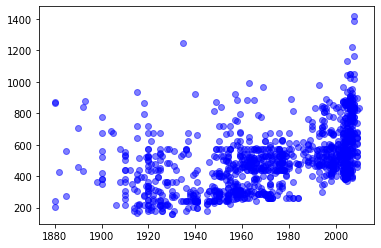

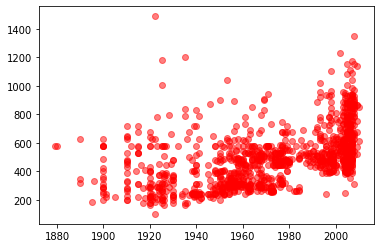

In [11]:
import scipy.signal
from matplotlib import pyplot as plt
import seaborn as sns
numeric_train=house_train.select_dtypes(include='number')
numeric_test=house_test.select_dtypes(include='number')
data_train = numeric_train.dropna()
data_test  = numeric_test.dropna()
target_train = data_train['SalePrice']
data_train=data_train.drop('SalePrice',axis=1)
data_train = data_train[data_test.columns]
plt.scatter(data_train['YearBuilt'],data_train['GarageArea'],c='b',alpha=0.5)
plt.show()
plt.scatter(data_test['YearBuilt'],data_test['GarageArea'],c='r',alpha=0.5)
plt.show()

**RESPUESTA**: Se puede observar un claro patrón de aumento en el tiempo de los tamaños de los garage en ambos conjuntos. Los patrones más locales también se preservan, como un tamaño relativamente estable entre los 50s hasta los 80s, una concentración entre los 80s y 90s' cerca de los 500, y un crecimiento muy fuerte con alta varianza después de los 2000s. En consecuencia, parece ser que ambos conjuntos tienes sesgos similares.

### 2- Regresión Lineal con Modelo Lineal en 1D

**2.1**- Muestre la matriz de correlación (con heatmap) **sólo** de aquellas características que tengan un valor mayor a 0.6 o menor -0.6 de correlación respecto al precio de venta en el conjunto de training.

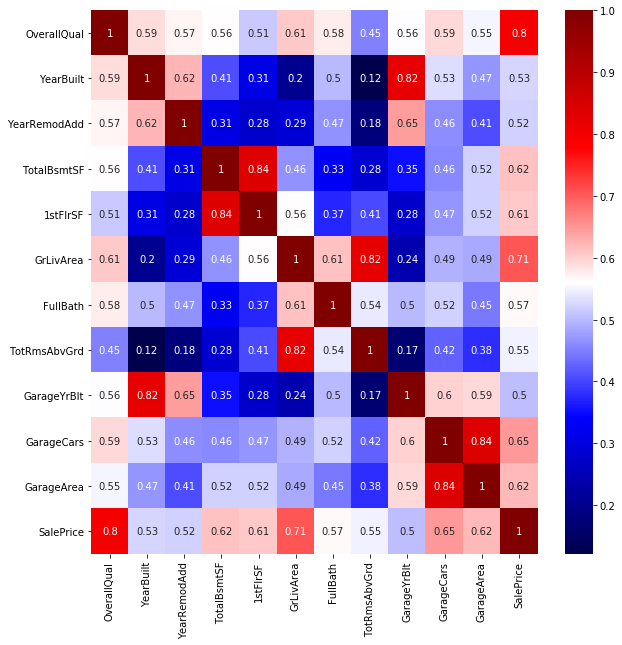

In [12]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
data_train['SalePrice']= target_train
corrmat = data_train.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(data_train[top_corr_features].corr(),annot=True,cmap="seismic")
plt.show()

**PREGUNTA**: Utilizando la descripción de las características, explique cuales son los 3 factores que más inciden en el precio de una casa, y comente brevemente si le parecen razonables.

**RESPUESTA**: Es evidente que la variable calidad (OverallQual) de la vivienda es un predictor del precio, pero hay otros factores importantes como la cantidad de metros cuadrados construidos para habitar (GrLivArea). La tercera variable puede ser más confusa, ya que corresponde a la cantidad de estacionamientos que tiene la casa, pero en efecto, la cantidad de autos por familia es un segmentador socioeconómico importante.

**2.2**- Haga un gráfico de dispersión por cada una de estas 3 características versus el precio de venta.

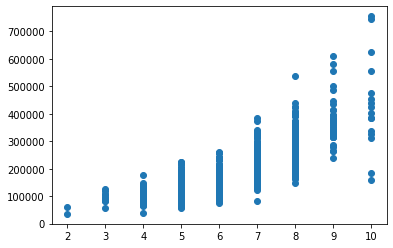

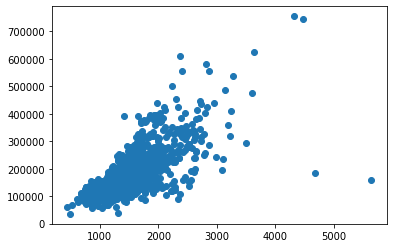

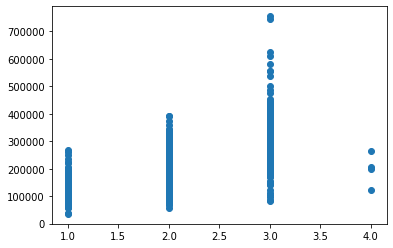

In [5]:
for dim in ['OverallQual','GrLivArea','GarageCars']:
    plt.figure()
    plt.scatter(data_train[dim],data_train['SalePrice'])

**PREGUNTA**: ¿Porqué sólo una de ellas es apta para regresión en 1D? Si considera que hay más de una apta para regresión, elija una.

**RESPUESTA**: Porque las otras dos son variables discretas. Esto no imposibilita la realización de regresión, pero es mucho menos significativa.

**2.3**- Con la característica seleccionada, realice una regresión lineal regularizada con modelo lineal. Incluya tanto regresión Ridge como Lasso. Grafique los datos y la línea de regresión.

**RECOMENDACIONES**:
* Estandarice sus datos
* Elimine las muestras con datos faltantes.
* Cree funciones para realizar las pruebas más facilmente.

In [13]:
from sklearn import preprocessing
#data_train=data_train.drop('SalePrice',axis=1)
X_train = data_train.values
X_test = data_test.values
std_scaler = preprocessing.StandardScaler()
std_scaler.fit(X_train)
data_train = pandas.DataFrame(std_scaler.transform(X_train),columns=data_train.columns)
data_test = pandas.DataFrame(std_scaler.transform(X_test),columns=data_test.columns)
data_train.describe()

ValueError: operands could not be broadcast together with shapes (1146,37) (38,) (1146,37) 

In [14]:
X = data_train['GrLivArea'].values
X = X.reshape(len(X),1)
y = target_train.values/1000000
X_test = data_test['GrLivArea'].values
X_test = X_test.reshape(len(X_test),1)

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=1)

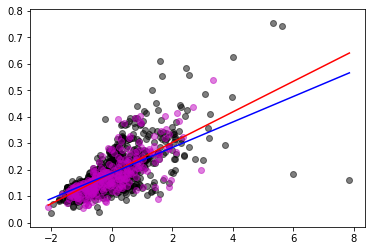

In [15]:
from sklearn import linear_model
import numpy as np

x_range = np.linspace(X.min(),X.max(),1000).reshape(1000,1)
ridge_regr = linear_model.Ridge(alpha=.01)
lasso_regr = linear_model.Lasso(alpha=.01)
ridge_regr.fit(X_train,y_train)
lasso_regr.fit(X_train,y_train)

y_line_rid = ridge_regr.predict(x_range)
y_line_las = lasso_regr.predict(x_range)

plt.scatter(X_train,y_train,c='k',alpha=0.5)
plt.scatter(X_valid,y_valid,c='m',alpha=0.5)
#plt.plot(x_range,y_line_lin,c='r')
plt.plot(x_range,y_line_rid,c='r')
plt.plot(x_range,y_line_las,c='b')

**PREGUNTA**: ¿Qué valores de `alpha` debemos utilizar para cambiar el comportamiento de la regresión tanto en Ridge como en Lasso?

**Respuesta**: Lasso con orden de 0.1 ya se degrada sustancialmente, en cambio es necesario valores del orden de 1000 para degradar el comportamiento de Ridge. Como es de esperar, a medida que la regularización disminuye de orden, ambos convergen a la misma solución de regresión lineal sin regularización

### 3- Regresión en ND
**3.1** Vuelva a utilizar todo el dataset, pero separe ahora el conjunto de entrenamiento en un conjunto de entrenamiento que contenga el 75% del original, y un conjunto de validación con el 25% del original (hint: `sklearn.model_selection`)

**RECOMENDACIONES**:
* Estandarice el set de entramiento y validación. Recuerde ocupar la misma tranformación para el testing.
* Elimine las muestras con datos faltantes y verifique que los conjuntos de entrenamiento y testing sean congruentes.
* Cree funciones para realizar las pruebas más facilmente.

In [16]:
X = data_train.values
y = target_train.values/1000000
X_test = data_test.values

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)

**PREGUNTA**: Comente las dificultades encontradas al hacer esta separación.

**3.2** Entrene ambos regresores regularizados para disntintos valores de `alpha` (100 valores distintos), y calcule el error cuadrático medio de entrenamiento y el error de validación. Con estos datos, gráfique la evolución del error de entrenamiento y validación dependiendo del peso de regularización. (hint: no calcule el error usted, ocupe `sklearn.metrics`)

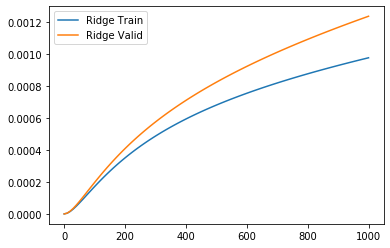

In [17]:
from sklearn.metrics import mean_squared_error as mse

mse_rid_train = []
mse_rid_valid = []
avec = np.linspace(0.0,1000,100)
for a in avec:
    ridge_regr = linear_model.Ridge(alpha=a)
    ridge_regr.fit(X_train,y_train)
    pred_train_ridge = ridge_regr.predict(X_train)
    pred_valid_ridge = ridge_regr.predict(X_valid)
    mse_rid_train.append(mse(y_train,pred_train_ridge))
    mse_rid_valid.append(mse(y_valid,pred_valid_ridge))
plt.plot(avec,mse_rid_train,label="Ridge Train")
plt.plot(avec,mse_rid_valid,label="Ridge Valid")
plt.legend()

In [ ]:
mse_las_train = []
mse_las_valid = []
avec = np.linspace(0.01,0.1,100)
for a in avec:
    lasso_regr = linear_model.Lasso(alpha=a)
    lasso_regr.fit(X_train,y_train)
    pred_train_lasso = lasso_regr.predict(X_train)
    pred_valid_lasso = lasso_regr.predict(X_valid)
    mse_las_train.append(mse(y_train,pred_train_lasso))
    mse_las_valid.append(mse(y_valid,pred_valid_lasso))
plt.plot(avec,mse_las_train,label="Lasso Train")
plt.plot(avec,mse_las_valid,label="Lasso Valid")
plt.legend()

**3.3** Haga lo mismo para el regresor `KernelRidge` con parámetro `kernel='rbf'`.

In [ ]:
from sklearn.kernel_ridge import KernelRidge
mse_rid_train = []
mse_rid_valid = []
avec = np.linspace(0.1,100,100)
for a in avec:
    ridge_regr = KernelRidge(alpha=a,kernel='rbf')
    ridge_regr.fit(X_train,y_train)
    pred_train_ridge = ridge_regr.predict(X_train)
    pred_valid_ridge = ridge_regr.predict(X_valid)
    mse_rid_train.append(mse(y_train,pred_train_ridge))
    mse_rid_valid.append(mse(y_valid,pred_valid_ridge))
plt.plot(avec,mse_rid_train,label="Ridge Train")
plt.plot(avec,mse_rid_valid,label="Ridge Valid")
plt.legend()

**PREGUNTA**: ¿Qué comportamiento observa? Si no observa ningún comportamiento, cambie los valores de `alpha`.

**3.4** Estime el precio de las casas en el conjunto de testing utilizando el mejor de los regresores con su mejor `alpha`. Grafíque la dispersión de cada característica de la sección 2.1 versus el precio de venta, tanto para los datos de training y testing en distintos colores.

In [ ]:
ridge_regr = linear_model.Ridge()
ridge_regr.fit(X_train,y_train)
pred_test = ridge_regr.predict(X_test)
pred_train = ridge_regr.predict(X_train)
pred_valid = ridge_regr.predict(X_valid)
for dim in top_corr_features:
    if dim == 'SalePrice':
        continue
    plt.figure()
    plt.scatter(data_train[dim],target_train/1000000,alpha=0.5)
    plt.scatter(data_test[dim],pred_test,alpha=0.5)

**PREGUNTA FINAL**: ¿Cree usted que esta regresión funciona apropiadamente? Fundamente.